## Get Confusion Matrices
Run all classifications for paper, giving the confusion matrices and the output accuracies

In [1]:
from ErrorML.ErrorML import *
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold


/Users/robin/anaconda3/envs/amy/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/robin/anaconda3/envs/amy/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/robin/anaconda3/envs/amy/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/robin/anaconda3/envs/amy/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [10]:
def run_and_get_cm(X_train, y_train, X_test, y_test):
    classifier = create_pipeline(kind='gnb_pca_default')
    classifier.fit(X_train, y_train)
    test_acc = classifier.score(X_test, y_test)
    y_pred = classifier.predict(X_test)
    
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average=None)
    recall = recall_score(y_test, y_pred, average=None)
    f1 = f1_score(y_test, y_pred, average='micro')
    
    #print(recall)
    cm = confusion_matrix(y_test, y_pred)
    return f1, cm

In [11]:
def run_multiple_times(filename, classes=[-2, -0.5, 0.5, 6.5], categorised=True, focal=False,
                       scale=False, exclude=None, absolute=False):
    df = load_data(filename)
    
    X, y = get_processed_data(df, classes=classes, categorised=categorised, focal=focal,
                              scale=scale, exclude=exclude, absolute=absolute)
    
    X = X.values
    conf_matrices = []
    test_accs = []

    for i in range(5):
        skf = StratifiedKFold(n_splits=5)
        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            ros = RandomOverSampler()
            X_train, y_train = ros.fit_resample(X_train, y_train)

            test_acc, cm = run_and_get_cm(X_train, y_train, X_test, y_test)
            conf_matrices.append(cm)
            test_accs.append(test_acc)

    sum_cms = np.dstack(conf_matrices).sum(axis=2)

    print(np.mean(test_accs))
    plot_confusion_matrix(sum_cms, classes=classes[:-1], normalize=True)
    return np.mean(test_accs)

In [12]:
classes_10 = [-2, -0.5, -0.2, -0.1, -0.05, 0, 0.05, 0.1, 0.2, 0.5, 6.5]
classes_3 = [-2, -0.2, 0.2, 6.5]

## Initialise output CSV

In [13]:
f = open('results_newMay2017_f1acc/accuracies.csv', 'w')
f.write('classes,year,accuracy\n')

22

## 2016, all vars, 3 class

Blur
(1522, 16)
(1522, 15)
Before BT
(1522, 15)
Index(['MaxSl_Foc', 'MinSl_Foc', 'StdSl_Foc', 'CQ_Mean_Foc', 'Rough40_Foc',
       'Slope', 'Rough40', 'CQ_Mean', 'Pt_Density', 'VEG_TREES', 'DepthRC_JD',
       'Shadow', 'Reflection', 'Type', 'Precsn_m'],
      dtype='object')
After BT
(1522, 16)
Index(['MaxSl_Foc', 'MinSl_Foc', 'StdSl_Foc', 'CQ_Mean_Foc', 'Rough40_Foc',
       'Slope', 'Rough40', 'CQ_Mean', 'Pt_Density', 'VEG_TREES', 'DepthRC_JD',
       'Shadow', 'Reflection', 'Precsn_m', 'Type_Exposed', 'Type_Submerged'],
      dtype='object')
At return
(1522, 16)
0.8252558694635134


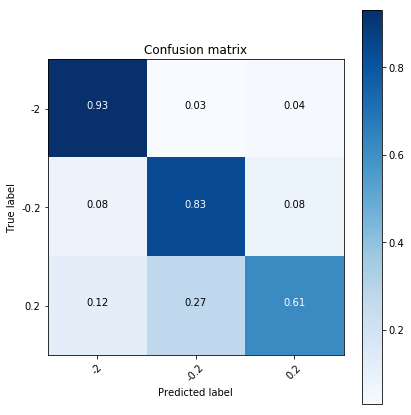

In [14]:
acc = run_multiple_times('2016_ValidationPts_ALL_Updated17May2019_ROBIN.csv', classes=classes_3, focal=None, exclude='Blur')
f.write('3,2016,%f\n' % acc)
plt.savefig('results_newMay2017_f1acc/2016_3class_allvars.png', dpi=300)

## 2016, all vars, 10 class

Blur
(1522, 16)
(1522, 15)
Before BT
(1522, 15)
Index(['MaxSl_Foc', 'MinSl_Foc', 'StdSl_Foc', 'CQ_Mean_Foc', 'Rough40_Foc',
       'Slope', 'Rough40', 'CQ_Mean', 'Pt_Density', 'VEG_TREES', 'DepthRC_JD',
       'Shadow', 'Reflection', 'Type', 'Precsn_m'],
      dtype='object')
After BT
(1522, 16)
Index(['MaxSl_Foc', 'MinSl_Foc', 'StdSl_Foc', 'CQ_Mean_Foc', 'Rough40_Foc',
       'Slope', 'Rough40', 'CQ_Mean', 'Pt_Density', 'VEG_TREES', 'DepthRC_JD',
       'Shadow', 'Reflection', 'Precsn_m', 'Type_Exposed', 'Type_Submerged'],
      dtype='object')
At return
(1522, 16)
0.2189615848412791


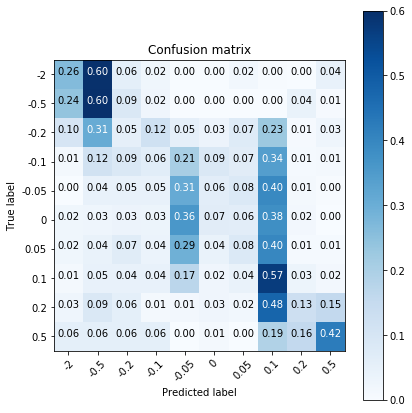

In [15]:
acc = run_multiple_times('2016_ValidationPts_ALL_Updated17May2019_ROBIN.csv', classes=classes_10, focal=None, exclude='Blur')
f.write('10,2016,%f\n' % acc)
plt.savefig('results_newMay2017_f1acc/2016_10class_allvars.png', dpi=300)

## 2017, all vars, 3 class

Blur
(2091, 16)
(2091, 15)
Before BT
(2091, 15)
Index(['MaxSl_Foc', 'MinSl_Foc', 'StdSl_Foc', 'CQ_Mean_Foc', 'Rough40_Foc',
       'Slope', 'Rough40', 'CQ_Mean', 'Pt_Density', 'VEG_TREES', 'DepthRC_JD',
       'Shadow', 'Reflection', 'Type', 'Precsn_m'],
      dtype='object')
After BT
(2091, 16)
Index(['MaxSl_Foc', 'MinSl_Foc', 'StdSl_Foc', 'CQ_Mean_Foc', 'Rough40_Foc',
       'Slope', 'Rough40', 'CQ_Mean', 'Pt_Density', 'VEG_TREES', 'DepthRC_JD',
       'Shadow', 'Reflection', 'Precsn_m', 'Type_Submerged', 'Type_Exposed'],
      dtype='object')
At return
(2091, 16)
0.8146474675554118


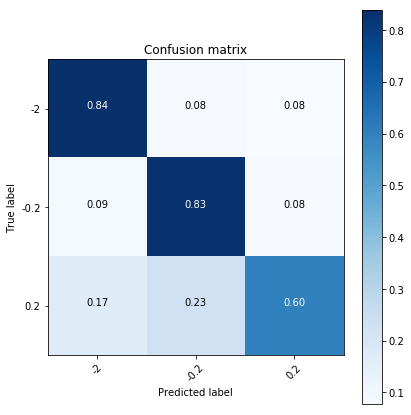

In [16]:
acc = run_multiple_times('2017_ValidationPts_ALL_Update17May2019_ROBIN.csv', classes=classes_3, focal=None, exclude='Blur')
f.write('3,2017,%f\n' % acc)
plt.savefig('results_newMay2017_f1acc/2017_3class_allvars.png', dpi=300)

## 2017, all vars, 10 class

Blur
(2091, 16)
(2091, 15)
Before BT
(2091, 15)
Index(['MaxSl_Foc', 'MinSl_Foc', 'StdSl_Foc', 'CQ_Mean_Foc', 'Rough40_Foc',
       'Slope', 'Rough40', 'CQ_Mean', 'Pt_Density', 'VEG_TREES', 'DepthRC_JD',
       'Shadow', 'Reflection', 'Type', 'Precsn_m'],
      dtype='object')
After BT
(2091, 16)
Index(['MaxSl_Foc', 'MinSl_Foc', 'StdSl_Foc', 'CQ_Mean_Foc', 'Rough40_Foc',
       'Slope', 'Rough40', 'CQ_Mean', 'Pt_Density', 'VEG_TREES', 'DepthRC_JD',
       'Shadow', 'Reflection', 'Precsn_m', 'Type_Submerged', 'Type_Exposed'],
      dtype='object')
At return
(2091, 16)
0.2954972228910478


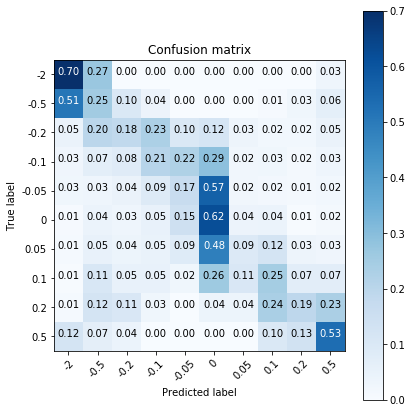

In [17]:
acc = run_multiple_times('2017_ValidationPts_ALL_Update17May2019_ROBIN.csv', classes=classes_10, focal=None, exclude='Blur')
f.write('10,2017,%f\n' % acc)
plt.savefig('results_newMay2017_f1acc/2017_10class_allvars.png', dpi=300)

## Both years, all vars, 3 class

Blur
(3613, 16)
(3613, 15)
Before BT
(3613, 15)
Index(['MaxSl_Foc', 'MinSl_Foc', 'StdSl_Foc', 'CQ_Mean_Foc', 'Rough40_Foc',
       'Slope', 'Rough40', 'CQ_Mean', 'Pt_Density', 'VEG_TREES', 'DepthRC_JD',
       'Shadow', 'Reflection', 'Type', 'Precsn_m'],
      dtype='object')
After BT
(3613, 16)
Index(['MaxSl_Foc', 'MinSl_Foc', 'StdSl_Foc', 'CQ_Mean_Foc', 'Rough40_Foc',
       'Slope', 'Rough40', 'CQ_Mean', 'Pt_Density', 'VEG_TREES', 'DepthRC_JD',
       'Shadow', 'Reflection', 'Precsn_m', 'Type_Exposed', 'Type_Submerged'],
      dtype='object')
At return
(3613, 16)
0.8041331160793108


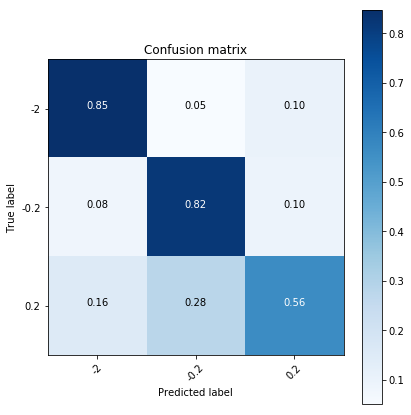

In [18]:
acc = run_multiple_times('2016-17_ValidationPts_ALL_Updated17May2019_ROBIN_Combined.csv', classes=classes_3, focal=None, exclude='Blur')
f.write('3,Both,%f\n' % acc)
plt.savefig('results_newMay2017_f1acc/BothYears_3class_allvars.png', dpi=300)

## Both years, all vars, 10 class

Blur
(3613, 16)
(3613, 15)
Before BT
(3613, 15)
Index(['MaxSl_Foc', 'MinSl_Foc', 'StdSl_Foc', 'CQ_Mean_Foc', 'Rough40_Foc',
       'Slope', 'Rough40', 'CQ_Mean', 'Pt_Density', 'VEG_TREES', 'DepthRC_JD',
       'Shadow', 'Reflection', 'Type', 'Precsn_m'],
      dtype='object')
After BT
(3613, 16)
Index(['MaxSl_Foc', 'MinSl_Foc', 'StdSl_Foc', 'CQ_Mean_Foc', 'Rough40_Foc',
       'Slope', 'Rough40', 'CQ_Mean', 'Pt_Density', 'VEG_TREES', 'DepthRC_JD',
       'Shadow', 'Reflection', 'Precsn_m', 'Type_Exposed', 'Type_Submerged'],
      dtype='object')
At return
(3613, 16)
0.2743942957149722


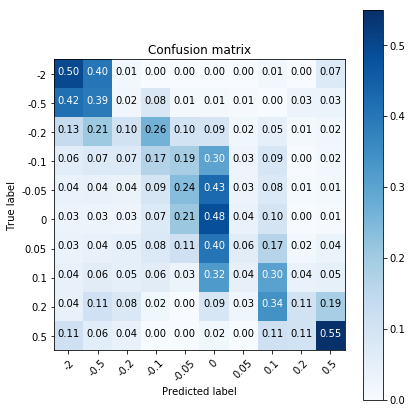

In [19]:
acc = run_multiple_times('2016-17_ValidationPts_ALL_Updated17May2019_ROBIN_Combined.csv', classes=classes_10, focal=None, exclude='Blur')
f.write('10,Both,%f\n' % acc)
plt.savefig('results_newMay2017_f1acc/BothYears_10class_allvars.png', dpi=300)

In [20]:
f.close()

In [22]:
!cat results_newMay2017_f1acc/accuracies.csv

classes,year,accuracy
3,2016,0.825256
10,2016,0.218962
3,2017,0.814647
10,2017,0.295497
3,Both,0.804133
10,Both,0.274394


In [5]:
df = load_data('2017_ValidationPts_ALL_Update17May2019_ROBIN.csv')

X, y = get_processed_data(df, classes=classes_3, categorised=True, focal=False,
                       scale=False, exclude=None, absolute=False)

Before BT
(2091, 11)
Index(['Slope', 'Rough40', 'CQ_Mean', 'Pt_Density', 'VEG_TREES', 'DepthRC_JD',
       'Shadow', 'Blur', 'Reflection', 'Type', 'Precsn_m'],
      dtype='object')
After BT
(2091, 12)
Index(['Slope', 'Rough40', 'CQ_Mean', 'Pt_Density', 'VEG_TREES', 'DepthRC_JD',
       'Shadow', 'Blur', 'Reflection', 'Precsn_m', 'Type_Submerged',
       'Type_Exposed'],
      dtype='object')
At return
(2091, 12)


In [7]:
pd.Series(y).value_counts() / len(y)

1    0.903396
2    0.069345
0    0.027260
dtype: float64